In [3]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use('default')

%matplotlib inline

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 30)
pd.set_option('precision', 7)

In [4]:
from pandas_datareader import data as web
import fix_yahoo_finance as yf

In [5]:
yf.pdr_override() # to override pandas_datareader.data.get_data_yahoo() method

In [6]:
start = datetime(2012, 1, 1)
end = datetime(2014, 12, 31)
msft = web.get_data_yahoo('MSFT', start, end)
msft.head()

[*********************100%***********************]  1 of 1 downloaded

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,22.909807,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,23.448965,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,23.688589,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,24.056585,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,23.739935,59706800


In [7]:
def get(tickers, start, end):
    def data(ticker):
        return web.get_data_yahoo(ticker, start, end)
    datas = [data(ticker) for ticker in tickers]
    return pd.concat(datas, keys=tickers, names=['Ticker', 'Date'])

In [8]:
tickers = ['AAPL','MSFT','GE','IBM','AA','DAL','UAL', 'PEP', 'KO']
all_data = get(tickers, start, end)

[*********************100%***********************]  1 of 1 downloaded

In [9]:
all_data.head()

Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2012-01-03  58.485714  58.928570  58.428570  58.747143  52.852215   
       2012-01-04  58.571430  59.240002  58.468571  59.062859  53.136253   
       2012-01-05  59.278572  59.792858  58.952858  59.718571  53.726177   
       2012-01-06  59.967144  60.392857  59.888573  60.342857  54.287819   
       2012-01-09  60.785713  61.107143  60.192856  60.247143  54.201706   

                     Volume  
Ticker Date                  
AAPL   2012-01-03  75555200  
       2012-01-04  65005500  
       2012-01-05  67817400  
       2012-01-06  79573200  
       2012-01-09  98506100

In [10]:
all_data.tail()

Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
KO     2014-12-23  42.540001  43.139999  42.470001  42.970001  39.286633   
       2014-12-24  43.099998  43.230000  42.919998  42.939999  39.259205   
       2014-12-26  42.970001  43.299999  42.930000  42.959999  39.277496   
       2014-12-29  42.799999  43.060001  42.490002  42.860001  39.186066   
       2014-12-30  42.740002  42.990002  42.650002  42.759998  39.094639   

                     Volume  
Ticker Date                  
KO     2014-12-23  13411300  
       2014-12-24   6405900  
       2014-12-26   6466900  
       2014-12-29   8694500  
       2014-12-30   9222000

### index data from yahoo

In [11]:
sp500 = web.get_data_yahoo('^GSPC', start, end)

[*********************100%***********************]  1 of 1 downloaded

In [12]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,-351257296
2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,-702387296
2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,20982704
2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,-638137296
2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,-923367296


### Visualizing financial time-series data

In [13]:
# reset the index to make everything columns
just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices[:5]

,Ticker,Date,Adj Close
0,AAPL,2012-01-03,52.852215
1,AAPL,2012-01-04,53.136253
2,AAPL,2012-01-05,53.726177
3,AAPL,2012-01-06,54.287819
4,AAPL,2012-01-09,54.201706


In [14]:
daily_close_px = just_closing_prices.pivot('Date', 'Ticker', 'Adj Close')
# daily_close_px = all_data.reset_index().pivot('Date', 'Ticker', 'Adj Close') also works
daily_close_px.head()

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2012-01-03,20.893421,52.852215,7.618264,15.116668,159.145142,29.434118,22.909807,56.260559,18.900000
2012-01-04,21.391430,53.136253,7.589838,15.281339,158.495911,29.249483,23.448965,56.548645,18.520000
2012-01-05,21.187698,53.726177,7.893052,15.273108,157.744171,29.110989,23.688589,56.108044,18.389999
2012-01-06,20.734970,54.287819,7.883575,15.355437,155.933182,28.926338,24.056585,55.404785,18.209999
2012-01-09,21.346153,54.201706,7.845675,15.528342,155.121643,28.926338,23.739935,55.692879,17.930000


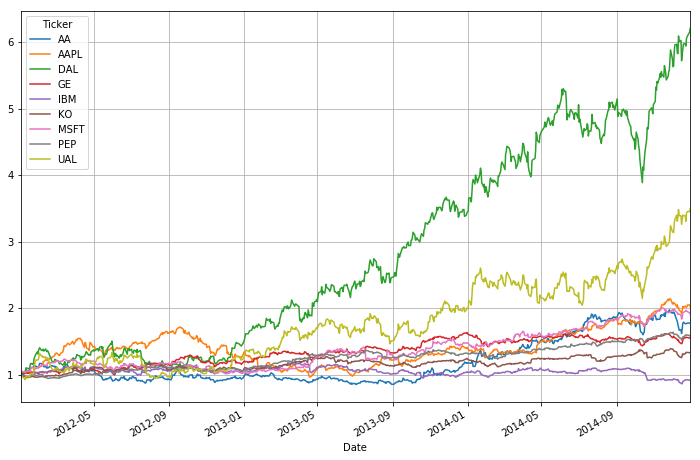

In [51]:
(daily_close_px.pct_change() + 1).cumprod().plot(figsize=(12, 8), grid=True);

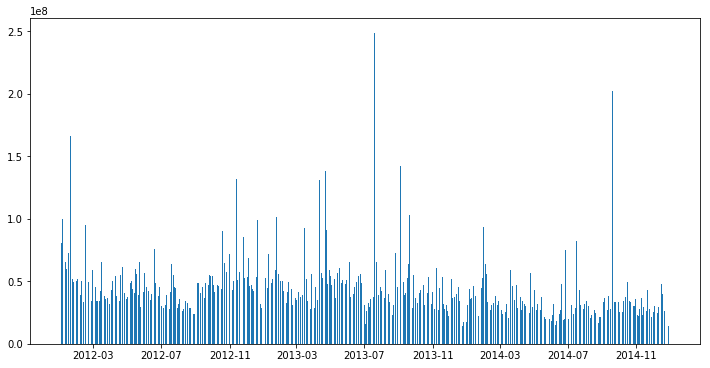

In [16]:
# plottting volume-series data

msftV = all_data.Volume.loc['MSFT']
plt.bar(msftV.index, msftV)
plt.gcf().set_size_inches(12, 6)

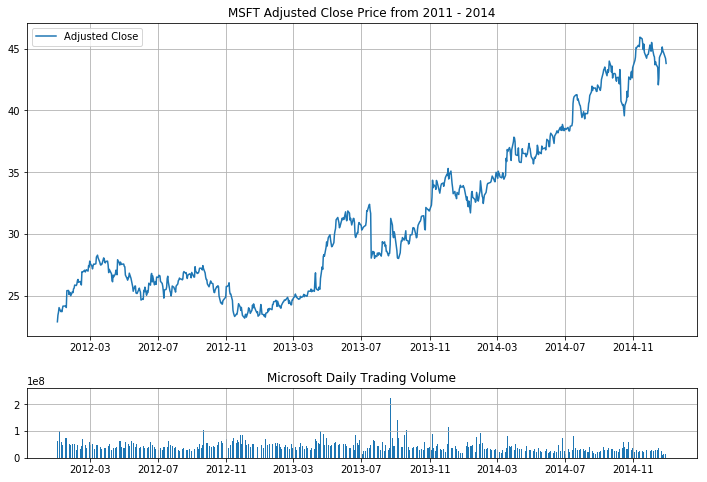

In [53]:
# Combined price and volumes

top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(daily_close_px.index, 
         daily_close_px.MSFT, 
         label='Adjusted Close')
top.grid(True)
plt.title('MSFT Adjusted Close Price from 2011 - 2014')
plt.legend(loc=2)
bottom = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV)
bottom.grid(True)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)

In [18]:
# Plotting candlesticks

subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'].reset_index()
subset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-01,47.880001,48.779999,47.709999,48.619999,45.287510,31191600
1,2014-12-02,48.840000,49.049999,48.200001,48.459999,45.138477,25773500
2,2014-12-03,48.439999,48.500000,47.810001,48.080002,44.784527,23534800
3,2014-12-04,48.389999,49.060001,48.200001,48.840000,45.492428,30320400
4,2014-12-05,48.820000,48.970001,48.380001,48.419998,45.101219,27313400
5,2014-12-08,48.259998,48.349998,47.450001,47.700001,44.430573,26663100
6,2014-12-09,47.110001,47.919998,47.049999,47.590000,44.328106,24330500
7,2014-12-10,47.580002,47.660000,46.700001,46.900002,43.685402,30431800
8,2014-12-11,47.080002,47.740002,46.680000,47.169998,43.936897,29060400
9,2014-12-12,46.779999,47.730000,46.669998,46.950001,43.731968,34248400


In [19]:
import matplotlib.dates as mdates
subset['date_num'] = subset.Date.apply(lambda date: mdates.date2num(date.to_pydatetime()))
# subset['date_num'] = subset.Date.apply(lambda date: mdates.date2num(date)) same result
subset

,Date,Open,High,Low,Close,Adj Close,Volume,date_num
0,2014-12-01,47.880001,48.779999,47.709999,48.619999,45.287510,31191600,735568.0
1,2014-12-02,48.840000,49.049999,48.200001,48.459999,45.138477,25773500,735569.0
2,2014-12-03,48.439999,48.500000,47.810001,48.080002,44.784527,23534800,735570.0
3,2014-12-04,48.389999,49.060001,48.200001,48.840000,45.492428,30320400,735571.0
4,2014-12-05,48.820000,48.970001,48.380001,48.419998,45.101219,27313400,735572.0
5,2014-12-08,48.259998,48.349998,47.450001,47.700001,44.430573,26663100,735575.0
6,2014-12-09,47.110001,47.919998,47.049999,47.590000,44.328106,24330500,735576.0
7,2014-12-10,47.580002,47.660000,46.700001,46.900002,43.685402,30431800,735577.0
8,2014-12-11,47.080002,47.740002,46.680000,47.169998,43.936897,29060400,735578.0
9,2014-12-12,46.779999,47.730000,46.669998,46.950001,43.731968,34248400,735579.0


In [20]:
# convert to list of tuples that matplotlib's candlestick_ohlc can work with

subset_as_tuples = [tuple(x) for x in subset[['date_num',
                                    'Open',
                                    'High',
                                    'Low',
                                    'Close']].values]
subset_as_tuples[:5]

[(735568.0, 47.880001, 48.779998999999997, 47.709998999999996, 48.619999),
 (735569.0, 48.840000000000003, 49.049999, 48.200001, 48.459998999999996),
 (735570.0, 48.439999, 48.5, 47.810001, 48.080002),
 (735571.0, 48.389998999999996, 49.060001, 48.200001, 48.840000000000003),
 (735572.0, 48.82, 48.970001000000003, 48.380001, 48.419998)]

In [21]:
print(subset_as_tuples[0])

(735568.0, 47.880001, 48.779998999999997, 47.709998999999996, 48.619999)


In [22]:
subset_as_tuples_zip = list(zip(subset[['date_num',
                                    'Open',
                                    'High',
                                    'Low',
                                    'Close']].values))
subset_as_tuples_zip[:5]

[(array([  7.35568000e+05,   4.78800010e+01,   4.87799990e+01,
           4.77099990e+01,   4.86199990e+01]),),
 (array([  7.35569000e+05,   4.88400000e+01,   4.90499990e+01,
           4.82000010e+01,   4.84599990e+01]),),
 (array([  7.35570000e+05,   4.84399990e+01,   4.85000000e+01,
           4.78100010e+01,   4.80800020e+01]),),
 (array([  7.35571000e+05,   4.83899990e+01,   4.90600010e+01,
           4.82000010e+01,   4.88400000e+01]),),
 (array([  7.35572000e+05,   4.88200000e+01,   4.89700010e+01,
           4.83800010e+01,   4.84199980e+01]),)]

In [23]:
print(type(subset_as_tuples[0]))
print(subset_as_tuples[0])
print(type(subset_as_tuples_zip[0]))
print(subset_as_tuples_zip[0])

<class 'tuple'>
(735568.0, 47.880001, 48.779998999999997, 47.709998999999996, 48.619999)
<class 'tuple'>
(array([  7.35568000e+05,   4.78800010e+01,   4.87799990e+01,
         4.77099990e+01,   4.86199990e+01]),)


In [24]:
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d')

In [25]:
from matplotlib.dates import WeekdayLocator, MONDAY
mondays = WeekdayLocator(MONDAY)

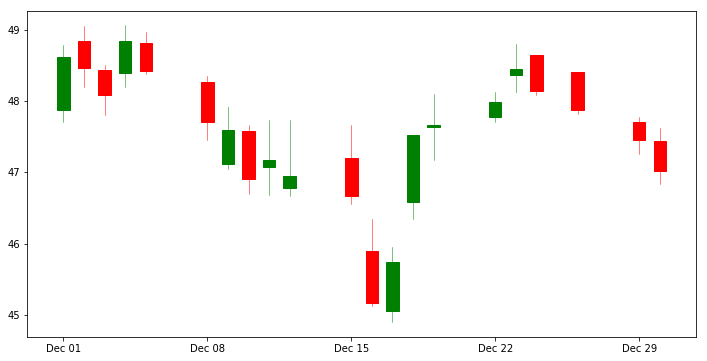

In [26]:
# draw the chart

# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 6))
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)
from matplotlib.finance import candlestick_ohlc
candlestick_ohlc(ax, subset_as_tuples, width=0.6,
                 colorup='g', colordown='r');

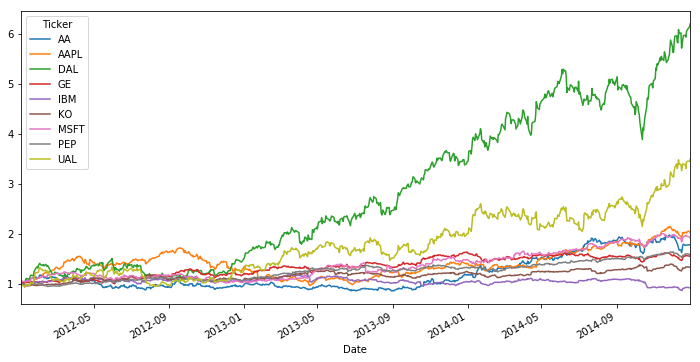

In [27]:
(daily_close_px.pct_change().fillna(0) + 1).cumprod().plot(figsize=(12, 6));

In [28]:
daily_pct_change = daily_close_px.pct_change().fillna(0)
daily_pct_change.head()

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2012-01-03,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
2012-01-04,0.0238357,0.0053742,-0.0037313,0.0108933,-0.0040795,-0.0062728,0.0235339,0.0051206,-0.0201058
2012-01-05,-0.0095240,0.0111021,0.0399500,-0.0005386,-0.0047430,-0.0047349,0.0102190,-0.0077915,-0.0070195
2012-01-06,-0.0213675,0.0104538,-0.0012007,0.0053905,-0.0114805,-0.0063430,0.0155347,-0.0125340,-0.0097879
2012-01-09,0.0294760,-0.0015862,-0.0048075,0.0112602,-0.0052044,0.0000000,-0.0131627,0.0051998,-0.0153761


In [29]:
aapl = daily_pct_change.AAPL
aapl.head()

Date
2012-01-03    0.0000000
2012-01-04    0.0053742
2012-01-05    0.0111021
2012-01-06    0.0104538
2012-01-09   -0.0015862
Name: AAPL, dtype: float64

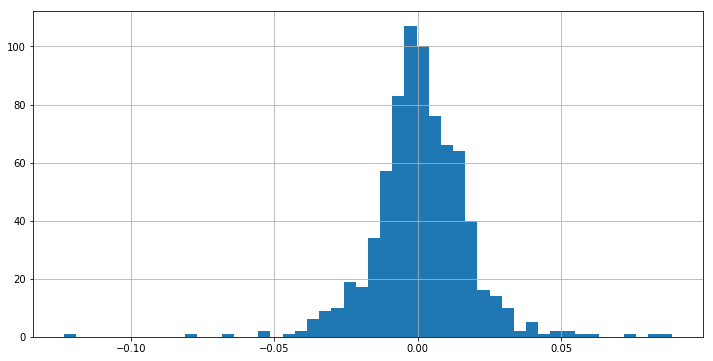

In [30]:
aapl.hist(bins=50, figsize=(12, 6));

In [31]:
aapl.describe()

count    753.0000000
mean       0.0010780
std        0.0168411
min       -0.1235579
25%       -0.0073126
50%        0.0005070
75%        0.0110131
max        0.0887414
Name: AAPL, dtype: float64

In [32]:
aapl.describe(percentiles=[0.025, 0.5, 0.975])

count    753.0000000
mean       0.0010780
std        0.0168411
min       -0.1235579
2.5%      -0.0319246
50%        0.0005070
97.5%      0.0317101
max        0.0887414
Name: AAPL, dtype: float64

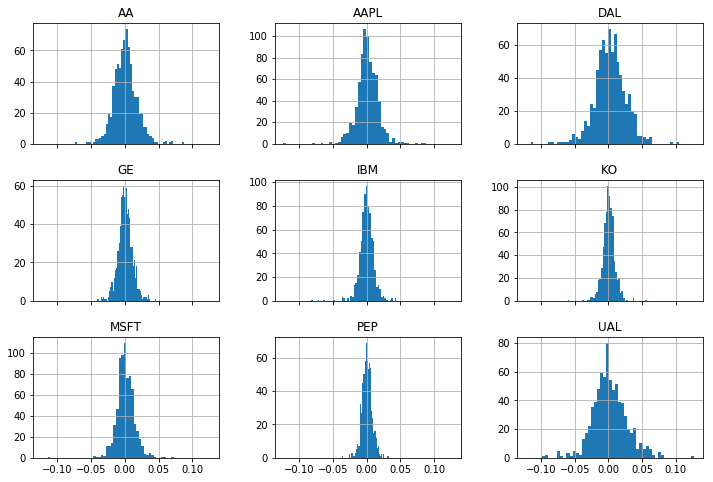

In [33]:
daily_pct_change.hist(bins=50, sharex=True, figsize=(12, 8));

C:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


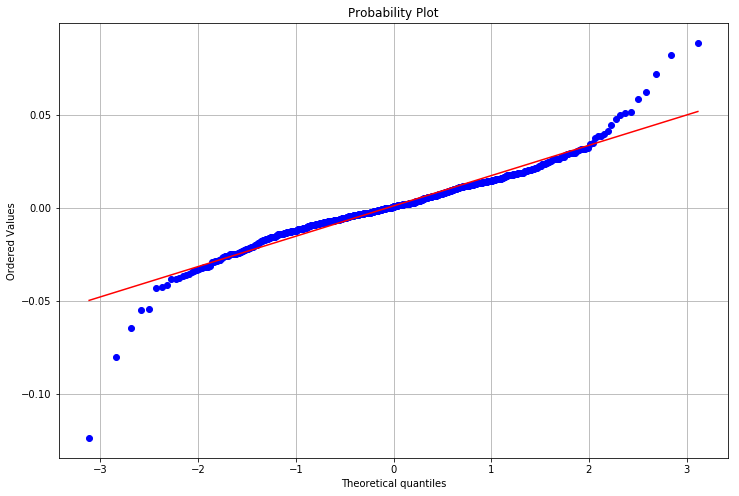

In [34]:
import scipy.stats as stats
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
ax.grid(True)
plt.show()

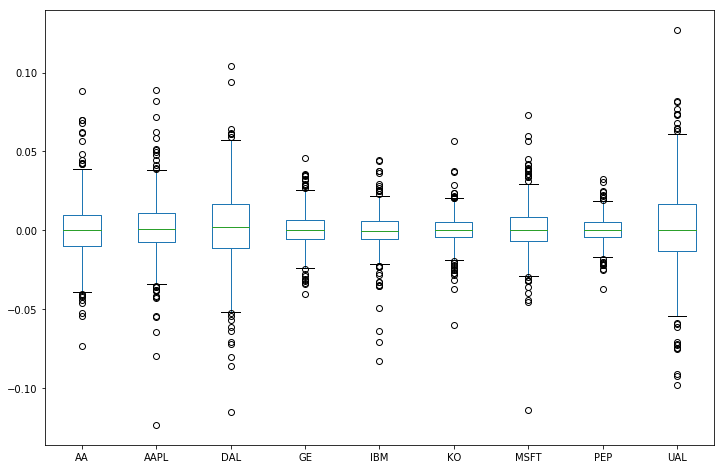

In [35]:
daily_pct_change.plot(kind='box', figsize=(12, 8));

In [36]:
def render_scatter_plot(data, x_stock_name, 
                        y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None:
        ax.set_xlim(xlim)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10, 10), (-10, 10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

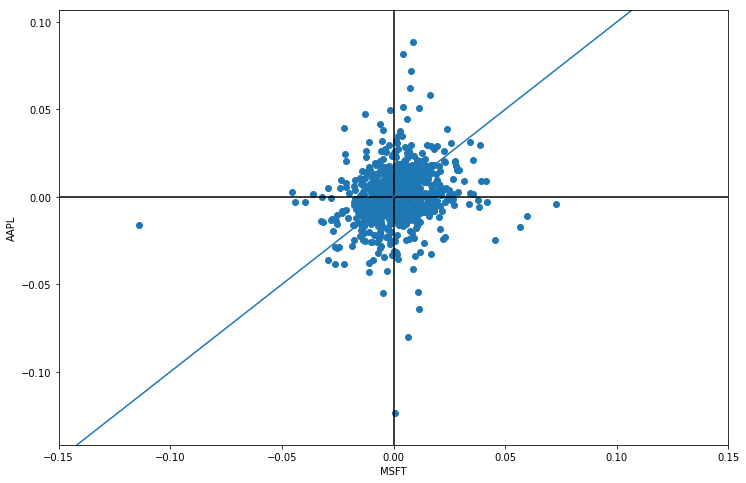

In [37]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'MSFT', 'AAPL', xlim=limits)

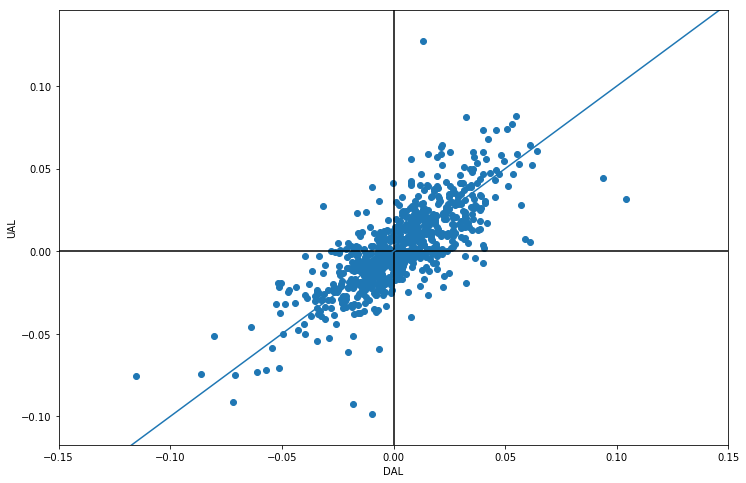

In [38]:
render_scatter_plot(daily_pct_change, 'DAL', 'UAL', xlim=limits)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  app.launch_new_instance()


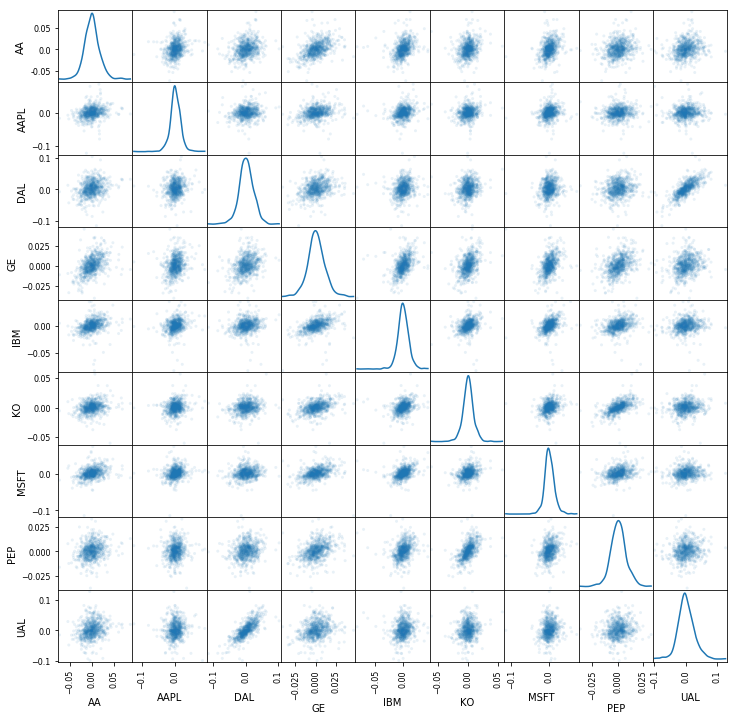

In [39]:
# all stocks against each other, with a KDE in the diagonal

pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1, figsize=(12, 12));

In [40]:
msftAC = msft['2012']['Adj Close']
msftAC.head()

Date
2012-01-03    22.909807
2012-01-04    23.448965
2012-01-05    23.688589
2012-01-06    24.056585
2012-01-09    23.739935
Name: Adj Close, dtype: float64

In [41]:
sample = msftAC
len(sample)

250

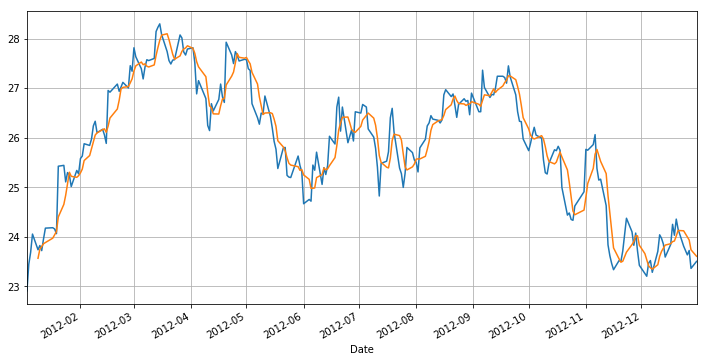

In [42]:
sample.plot(figsize=(12, 6), grid=True);
# pd.rolling_mean(sample, 5).plot(figsize=(12, 6)); deprecated. 


# d.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
# 	Series.rolling(window=5,center=False).mean()

sample.rolling(window=5, center=False).mean().plot(grid=True);

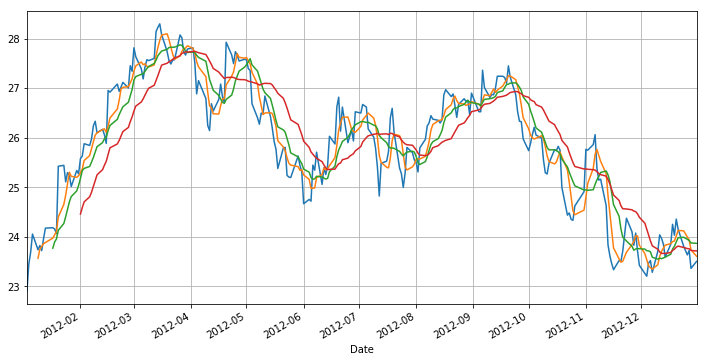

In [43]:
sample.plot(figsize=(12, 6))
for period in [5, 10, 21]:
    sample.rolling(window=period).mean().plot(grid=True);

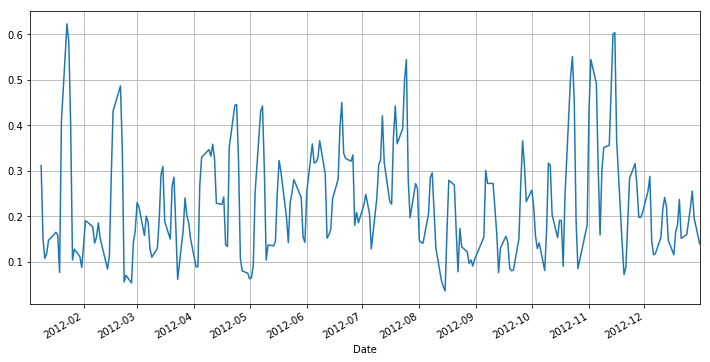

In [44]:
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
sample.rolling(window=5).apply(mean_abs_dev).plot(figsize=(12, 6), grid=True);

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.expanding_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.expanding(min_periods=1).mean()
  from ipykernel import kernelapp as app


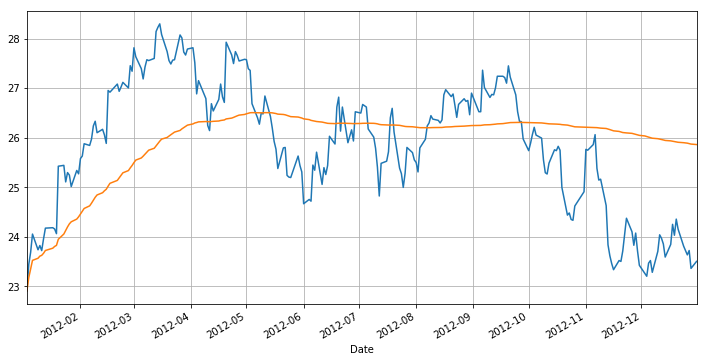

In [45]:
sample.plot(figsize=(12, 6))
pd.expanding_mean(sample).plot(grid=True);

# FutureWarning: pd.expanding_mean is deprecated for Series and will be removed in a future version, replace with 
# 	Series.expanding(min_periods=1).mean()


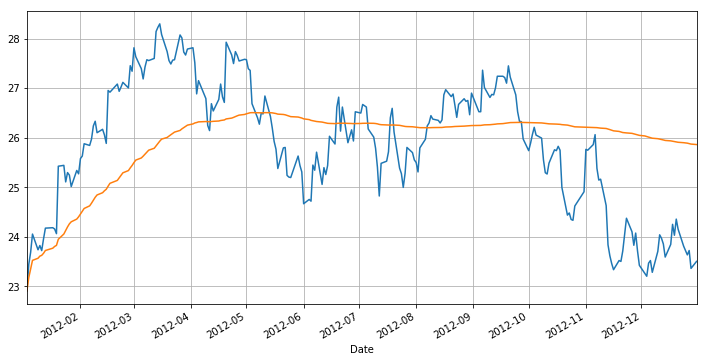

In [46]:
sample.plot(figsize=(12, 6))
sample.expanding(min_periods=1).mean().plot(grid=True);

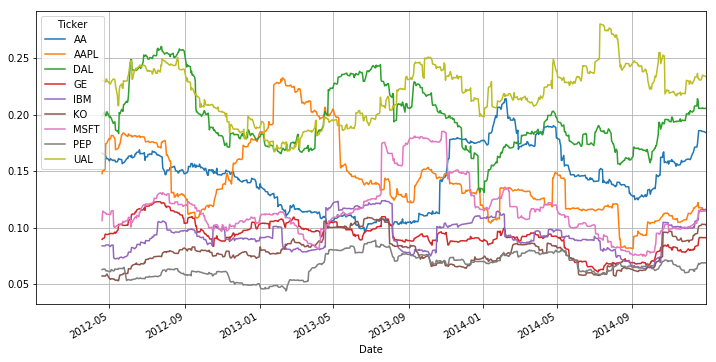

In [47]:
period = 75
vol = daily_pct_change.rolling(window=period).std() * np.sqrt(period)
# he multiplies by np.sqrt(period) to get 75-days volatility. To get annualized volatility he'd have
# to multiply x252 i think

vol.plot(figsize=(12, 6), grid=True);

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)
  app.launch_new_instance()


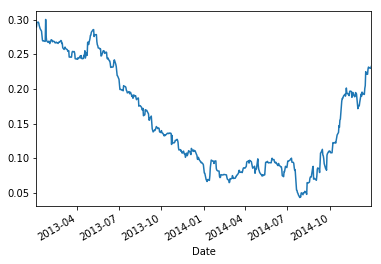

In [48]:
rolling_corr = pd.rolling_corr(daily_pct_change.AAPL,
                               daily_pct_change.MSFT,
                               window=252).dropna()

rolling_corr.plot()


# pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
# 	Series.rolling(window=252).corr(other=<Series>)

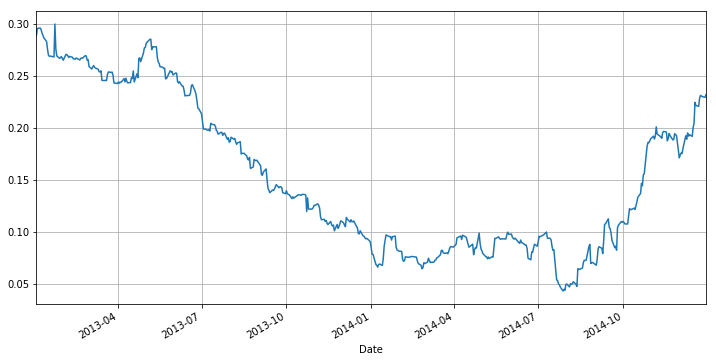

In [49]:
rolling_corr = daily_pct_change.AAPL.rolling(window=252).corr(other=daily_pct_change.MSFT).dropna()

rolling_corr.plot(figsize=(12, 6), grid=True);

In [50]:
# least-squares regression of returns

model = pd.ols(y=daily_pct_change.AAPL,
               x=daily_pct_change.MSFT,
               window=250)

model

AttributeError: module 'pandas' has no attribute 'ols'

In [ ]:
# least-squares regression of returns

model = pd.ols(y=daily_pct_change.AAPL,
               x={'MSFT': daily_pct_change['MSFT']},
               window=250)

model

In [ ]:
plt.scatter(daily_pct_change.MSFT, daily_pct_change.AAPL);

In [ ]:
model.beta.MSFT.plot()

In [ ]:
# comparing stocks to the sp500

sp_500_dpc = sp500['Adj Close'].pct_change().fillna(0)
sp_500_dpc.head()

In [ ]:
dpc_all = pd.concat([sp_500_dpc, daily_pct_change], axis=1)
dpc_all.rename(columns={'Adj Close': 'SP500'}, inplace=True)
dpc_all.tail()

In [ ]:
# cumulative daily returns
cdr_all = (1 + dpc_all).cumprod()
cdr_all.plot(figsize=(12, 6), grid=True);

In [ ]:
dpc_corrs = dpc_all.corr()
dpc_corrs

In [ ]:
dpc_corrs.SP500

In [ ]:
cdr_all[['SP500', 'GE', 'UAL']].plot(figsize=(12,8));

In [ ]:
render_scatter_plot(dpc_all, 'SP500', 'GE')